<a href="https://colab.research.google.com/github/Giovannisb/Portifolio_data_science/blob/master/Analisando_os_Dados_do_Airbnb_Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Los Angeles*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles - California, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


##Pacotes de bibliotecas

Irei importar algumas bibliotecas que serão necessárias para auxiliar na análise dos dados, como o pandas, matplotlib e o seaborn.

**Pandas** é uma biblioteca desenvolvida para manipulação e análise de dados. Ela irá me auxiliar na estruturação e manipulação das tabelas numéricas dos dados, além de filtrar e limpar os dados desnecessários.

**Matplotlib** será usada na criação e visualização dos dados em geral, auxiliando no melhor entendimento das pessoas do que esses dados representam.

**Seaborn** também é uma biblioteca gráfica porém, um grau a cima da Matplotlib. Ela é aplicada para o entendimento de distribuição e correlações criando gráficos.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Irei importar os dados para o colab utilizando uma função do **Pandas** para ler arquivos csv. Nesse caso irei importar a partir de uma url e criarei o que chamamos de *Dataframe*, que será nossa tabela com os dados. 

Estarei utilizando a forma mais simples dos dados disponibilizados pelo Airbnb, que se chama "listings.csv" pois, não será necessário utilizar um dataframe complexo com muitos dados, apenas o essencial.

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2020-05-08/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,38
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.17,1,97
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,24,2020-03-17,0.33,2,281
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,2019-12-27,0.19,2,365
4,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,14,0,NaN,NaN,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Iremos dar início as análises desses dados com a identificação das quantidades de entradas e variáveis, além de ver os tipos de cada coluna.

Como eu citei no começo, esse *Dataset* é uma versão resumida dos dados disponibilizados pelo Airbnb.  Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com mais entradas e variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 37048
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

No nosso caso, nosso *Dataset* tem **37048 entradas** e **16 variáveis**. Bastante coisa para analisar-mos


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *Dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.206084
last_review                       0.206084
host_name                         0.000135
name                              0.000054
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Com uma breve análise das variáveis do nosso *Dataset*, podemos identificar que:

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 20% dos seus valores.
* As variáveis `name` e `host_name` têm menos de 0,1% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para poder-mos visualizar melhor esses dados, irei plotar um *histograma* de cada variável numérica do *Dataset*. Dessa forma iremos compreender como está a distribuição desses valores.

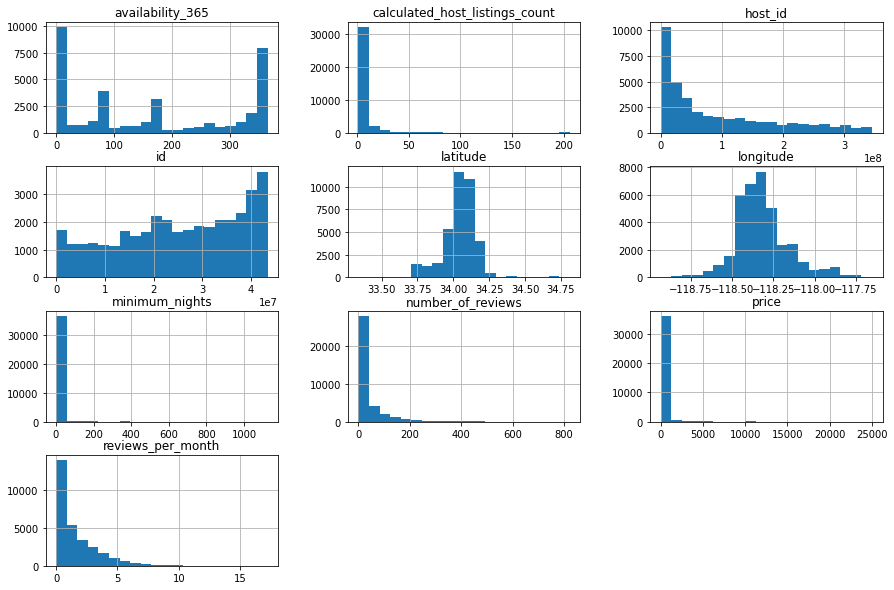

In [12]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,10));

Com esses gráficos, ja podemos identificar algumas coisas como:

* A variável `price`, a maioria dos seus valores é bem abaixo de $5.000.
* As variáveis `availability_365` tem valores bem variáveis, distribuidos ao longo do gráfico.

###**Q4. Há outliers presentes?** ###

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores tem pontos discrepantes, e distorcem a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [13]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,37048.000000,37048.000000,37048.000000,29413.000000,37048.000000,37048.000000
mean,227.916379,12.715369,35.201387,1.605461,8.125513,168.061353
std,685.160627,26.759290,64.277015,1.750648,23.030745,142.799526
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.300000,1.000000,5.000000
50%,109.000000,3.000000,8.000000,0.960000,2.000000,153.000000
75%,185.000000,30.000000,40.000000,2.410000,5.000000,336.000000
max,25000.000000,1125.000000,822.000000,17.230000,206.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 185, porém seu valor máximo é 25000.
* A quantidade mínima de noites (`minimum_nights`) tem 75% dos seus valores até 30 porém, seu valor máximo chega a 1125, que equivale a pouco mais de 3 anos. Valor bastante discrepante.

Iremos plotar um gráfico chamado *Boxplot*. Ese gráfico permite que visualizamos melhor os *outliers*, que são os pontos discrepantes das nossa análise.

#### Boxplot para minimum_nights

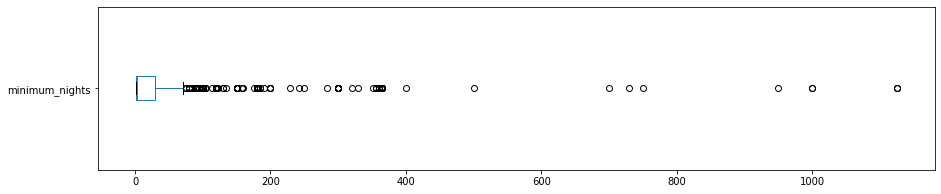

minimum_nights: valores acima de 30:
2672 entradas
7.2123%


In [15]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

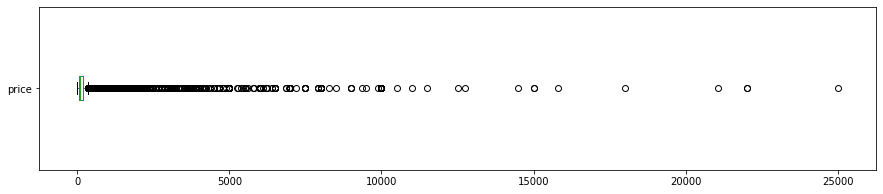


price: valores acima de 462
2603 entradas
7.0260%


In [44]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 5000 para price
print("\nprice: valores acima de 462")
print("{} entradas".format(len(df[df.price > 462])))
print("{:.4f}%".format((len(df[df.price > 462]) / df.shape[0])*100))

Estipulamos um valor aproximadamente de 2,5x o valor de 75% das entradas para podermos filtrar, que será de 462.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

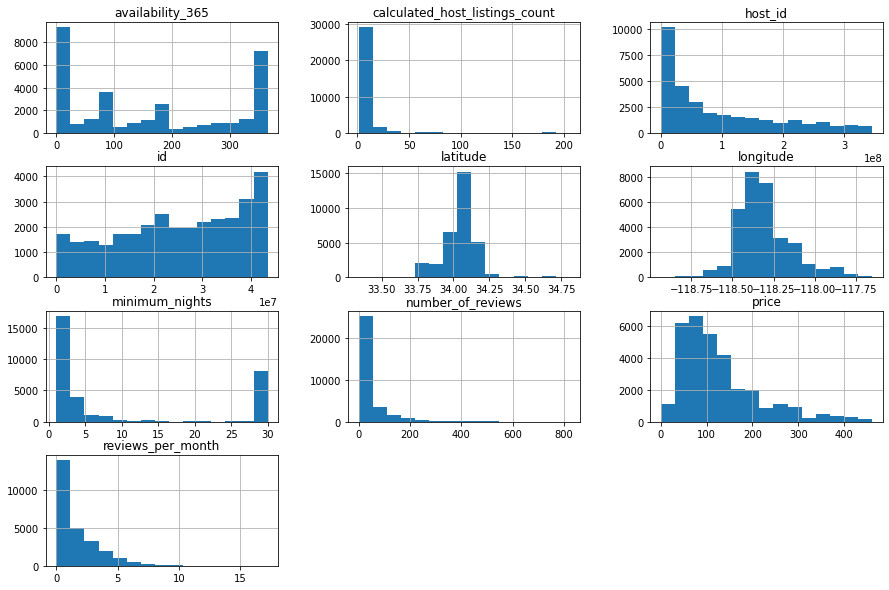

In [46]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 462].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Agora temos valores mais realistas para esses dados.

### **Q5. Qual a média dos preços de aluguel?**

In [47]:
# ver a média da coluna `price``
df[['price']].describe()

,price
count,37048.000000
mean,227.916379
std,685.160627
min,0.000000
25%,69.000000
50%,109.000000
75%,185.000000
max,25000.000000


Com os dados da coluna `price` limpos de *outliers*, podemos identificar que a média dos preços dos imóveis está em $227,91.

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [49]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.005824,-0.039147,-0.048502,0.019636,0.054538
minimum_nights,-0.005824,1.000000,-0.115422,-0.217271,0.218944,0.068474
number_of_reviews,-0.039147,-0.115422,1.000000,0.711768,-0.086194,0.092700
reviews_per_month,-0.048502,-0.217271,0.711768,1.000000,-0.073790,0.052251
calculated_host_listings_count,0.019636,0.218944,-0.086194,-0.073790,1.000000,0.121497
availability_365,0.054538,0.068474,0.092700,0.052251,0.121497,1.000000


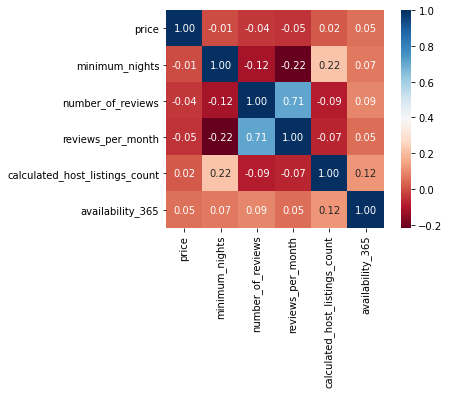

In [50]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com o *Heatmap* podemos observar que existem correlações mais fortes entre as variáveis:

* `calculated_host_listings_count	` e `minimum_nights`
* `reviews_per_month` e `number_of_reviews`
* 

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [51]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18947
Private room       11634
Shared room         1173
Hotel room           174
Name: room_type, dtype: int64

In [52]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.593429
Private room       0.364382
Shared room        0.036739
Hotel room         0.005450
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Los Angeles?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [53]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lake Hughes                              300.000000
Malibu                                   265.652778
North Whittier                           260.000000
Avalon                                   250.285714
Bel-Air                                  214.600000
Manhattan Beach                          207.586667
Beverly Crest                            206.131148
Unincorporated Santa Monica Mountains    200.078947
Castaic Canyons                          192.187500
Topanga                                  187.483871
Name: price, dtype: float64

Acima, podemos identificar que os bairros de Lake Hughes, Malibu e North Whittier, são os bairros com as maiores médias de preço.

Uma pessoa que não conhecesse Los Angeles poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Lake Hughes.

In [56]:
# ver quantidade de imóveis em Lake Hughes
print(df_clean[df_clean.neighbourhood == "Lake Hughes"].shape)

# ver a única entrada em Lake hughes
df_clean[df_clean.neighbourhood == "Lake Hughes"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31472,40030179,The Lake Hughes Inn,287826714,Jeannette,Unincorporated Areas,Lake Hughes,34.67238,-118.42953,Entire home/apt,300,2,1,2020-02-17,0.36,1,177


Usando o mesmo pensamento, vamos ver quantas entradas existem para o bairro que tem o valor mais próximo da média, que é Bel-Air.

In [57]:
# ver quantidade de imóveis em Bel-Air
print(df_clean[df_clean.neighbourhood == "Bel-Air"].shape)

# ver as entradas em Bel-Air
df_clean[df_clean.neighbourhood == "Bel-Air"]

(25, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2014,2873621,Private Ensuite Room/Bath in Unique Serene Set...,14687073,Don,City of Los Angeles,Bel-Air,34.08840,-118.46123,Private room,140,3,39,2020-04-01,0.57,3,342
2109,3084267,Private Ensuite Room/Bath in Serene Setting #2,14687073,Don,City of Los Angeles,Bel-Air,34.09003,-118.46173,Private room,140,3,8,2019-09-16,0.17,3,1
2429,3684911,Nice Apartment in West LA,5672642,Franck,City of Los Angeles,Bel-Air,34.07731,-118.46650,Entire home/apt,105,30,1,2014-09-08,0.01,2,0
3346,5183225,3 BEDROOMS/2 BATH BEL AIR VILLA/VIEWS/CELEBS!,26808984,Nadia,City of Los Angeles,Bel-Air,34.11035,-118.46295,Entire home/apt,449,2,2,2015-12-30,0.03,1,363
6430,10784354,Bel Air Private & Relaxing Modern Home w/ HotTub,4656446,A.C.,City of Los Angeles,Bel-Air,34.08920,-118.43771,Private room,300,30,60,2019-12-23,1.30,49,309
7692,13118084,BEL AIR MAJESTIC,1150474,Paolo,City of Los Angeles,Bel-Air,34.08430,-118.45766,Entire home/apt,400,10,0,NaN,NaN,1,0
8171,13688397,SEXY 3 BEDROOM/2BATH BEL AIR VILLA/ VIEWS/CELE...,79746176,Ray,City of Los Angeles,Bel-Air,34.12155,-118.46452,Entire home/apt,449,3,0,NaN,NaN,1,362
8753,14452904,Double room with great amenities in Bel Air,77189900,Philip,City of Los Angeles,Bel-Air,34.12983,-118.46573,Private room,150,2,10,2019-12-01,0.90,2,0
9888,16069621,Bel Air Charming Studio with a pool,64960627,Benton,City of Los Angeles,Bel-Air,34.07716,-118.46832,Entire home/apt,97,1,1,2017-12-14,0.03,1,0
14234,21394197,Explore Bel Air & Beverly Hills from a Colorfu...,1106156,Allie,City of Los Angeles,Bel-Air,34.09407,-118.44153,Entire home/apt,220,1,113,2020-04-18,3.92,1,0


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

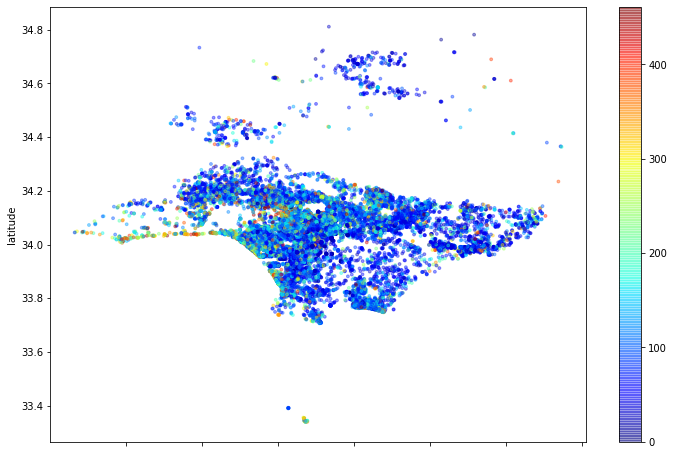

In [58]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [59]:
# ver a média da coluna `minimum_nights`
df[['minimum_nights']].describe()

,minimum_nights
count,37048.000000
mean,12.715369
std,26.759290
min,1.000000
25%,1.000000
50%,3.000000
75%,30.000000
max,1125.000000


Em média, os imóveis são alugados por 12 noites e no mínimo por 1 noite.

## Conclusões


Esta foi apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.